<a href="https://colab.research.google.com/github/ritik-hue/deep-learning-projects/blob/main/Facemaskdetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
with_mask_files=os.listdir('/content/drive/MyDrive/data/with_mask')

In [3]:
without_mask_files=os.listdir('/content/drive/MyDrive/data/without_mask')

In [4]:
with_mask_label=[1]*len(with_mask_files)
without_mask_label=[0]*len(without_mask_files)

In [11]:
labels=with_mask_label + without_mask_label

In [15]:
with_mask_path='/content/drive/MyDrive/data/with_mask/'
data=[]
for img_file in with_mask_files:
  image=Image.open(with_mask_path + img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

without_mask_path='/content/drive/MyDrive/data/without_mask/'
for img_file in without_mask_files:
  image=Image.open(without_mask_path + img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
data[0].shape

(128, 128, 3)

In [17]:
X=np.array(data)
Y=np.array(labels)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [19]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [24]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [25]:
num_of_classes=2
model=keras.Sequential()
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
##use sigmoid for binary classification and softmax for multi-class classification
model.add(layers.Dense(num_of_classes,activation='sigmoid'))


In [29]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [30]:
history=model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
171/171 [==============================] - 17s 23ms/step - loss: 0.4620 - acc: 0.8125 - val_loss: 0.2792 - val_acc: 0.8880
Epoch 2/5
171/171 [==============================] - 3s 18ms/step - loss: 0.2845 - acc: 0.8776 - val_loss: 0.2707 - val_acc: 0.8797
Epoch 3/5
171/171 [==============================] - 3s 20ms/step - loss: 0.2501 - acc: 0.8998 - val_loss: 0.2329 - val_acc: 0.8962
Epoch 4/5
171/171 [==============================] - 3s 19ms/step - loss: 0.2049 - acc: 0.9168 - val_loss: 0.2517 - val_acc: 0.8962
Epoch 5/5
171/171 [==============================] - 3s 17ms/step - loss: 0.1824 - acc: 0.9230 - val_loss: 0.2452 - val_acc: 0.9127


In [31]:
loss,accuracy=model.evaluate(x_test_scaled,y_test)
print('test accuracy is',accuracy)

48/48 [==============================] - 1s 14ms/step - loss: 0.1937 - acc: 0.9268
test accuracy is 0.9267809987068176


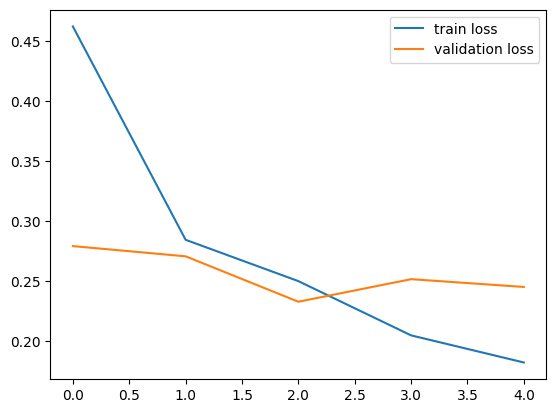

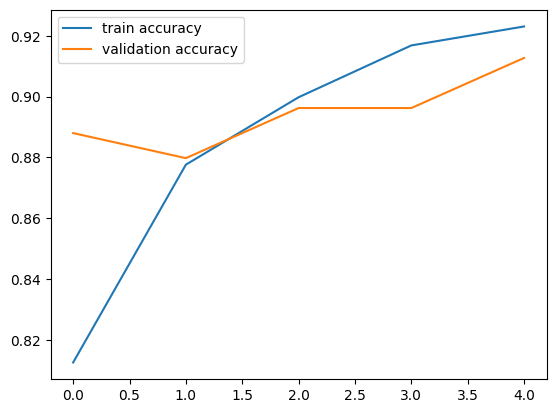

In [32]:
h=history
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

path of image to be predicted/content/drive/MyDrive/data/with_mask/with_mask_5.jpg


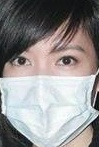

1/1 [==============================] - 0s 22ms/step
[[0.49572986 0.5106376 ]]
1
the person is wearing a mask


In [35]:
input_image_path=input('path of image to be predicted')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resized/255
input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])
input_prediction=model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label==1:
  print('the person is wearing a mask')
else:
  print('the person is not wearing a mask')